In [1]:
import re
import string
import numpy as np 
import random
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from plotly import graph_objs as go
import plotly.express as px
import plotly.figure_factory as ff
from collections import Counter
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import nltk
from nltk.corpus import stopwords
from tqdm import tqdm
import os
import nltk
import spacy
import random
from spacy.util import compounding
from spacy.util import minibatch
import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv('cleaned_version_tweets.csv')

In [3]:
data.head()

username          fullname     time        date  \
0    @bwayangelina         angelina💌  9:47 AM  2020-04-02   
1        @debihope  Notorious d.e.b.  7:21 AM  2020-07-17   
2  @mila_d_aguilar   Mila D. Aguilar  9:30 AM  2020-05-02   
3       @PinkedOff    PinkedOff 🏳️‍🌈  9:31 AM  2020-06-17   
4   @Cynic96092787          🇨🇦 🍁 Ray  3:14 PM  2020-04-16   

                                                text  \
0  i mean we all kinda knew cause the whole cast ...   
1  Got my COVID test, it was so fast. That swab i...   
2                      Sorry to hear that. No COVID?   
3  All aboard the COVID Express! Why are they try...   
4  Perhaps this COVID-19 serves a purpose after a...   

                                                link             tweet_ID  t1  \
0  https://twitter.com/anyuser/status/12457548356...  1245754835632377858   0   
1  https://twitter.com/anyuser/status/12841310586...  1284131058699698184   1   
2  https://twitter.com/anyuser/status/12566221910...  1256622191027748864   1   
3  https://twitter.com/anyuser/status/12732920725...  1273292072594878466   0   
4  https://twitter.com/anyuser/status/12509103515...  1250910351580938245   1   

   t2  t3  ...  fear_intensity  sadness_intensity  joy_intensity  \
0   1   1  ...           0.515              0.462          0.268   
1   0   1  ...           0.552              0.407          0.313   
2   0   0  ...           0.451              0.549          0.112   
3   1   0  ...           0.545              0.496          0.172   
4   0   0  ...           0.370              0.371          0.320   

   sentiment_category  emotion_category  keyword_used              user_ID  \
0            negative             anger         covid   758150516933177344   
1            negative              fear         covid             40366824   
2       very negative           sadness         covid           3098361703   
3       very negative             anger         covid  1010320666648645632   
4            negative             anger         covid             79449626   

   mentions  hashtags  photos  
0        []        []      []  
1        []        []      []  
2        []        []      []  
3        []        []      []  
4        []        []      []  

[5 rows x 29 columns]

In [6]:
data_filtered = data[["date", "text","sentiment_category"]]

In [14]:
sentiment_categories = {
                        'very negative': -1,
                        'negative': -1,
                        'neutral': 0,
                        'positive': 1,
                        'very positive': 1
                        }

In [16]:
data_filtered["polarity"] = data.sentiment_category.map(sentiment_categories)

In [19]:
data_filtered

date                                               text  \
0     2020-04-02  i mean we all kinda knew cause the whole cast ...   
1     2020-07-17  Got my COVID test, it was so fast. That swab i...   
2     2020-05-02                      Sorry to hear that. No COVID?   
3     2020-06-17  All aboard the COVID Express! Why are they try...   
4     2020-04-16  Perhaps this COVID-19 serves a purpose after a...   
...          ...                                                ...   
4395  2020-06-07  New post: Global COVID-19 cases cross 7 millio...   
4396  2020-07-27  Canadian citizens who live in the US are comin...   
4397  2020-04-27  After Covid19 2 things increased...Corona pati...   
4398  2020-06-27  Reporter Who Covered President Trump's Tulsa R...   
4399  2020-04-15  The pink gin? 😩😩Dont tell me that .. I’ll end ...   

     sentiment_category  polarity  
0              negative        -1  
1              negative        -1  
2         very negative        -1  
3         very negative        -1  
4              negative        -1  
...                 ...       ...  
4395           positive         1  
4396            neutral         0  
4397           positive         1  
4398           positive         1  
4399            neutral         0  

[4400 rows x 4 columns]

In [25]:
temp = data_filtered.groupby('sentiment_category').count()['text'].reset_index().sort_values(by='text',ascending=False)
temp.style.background_gradient(cmap='Blues')

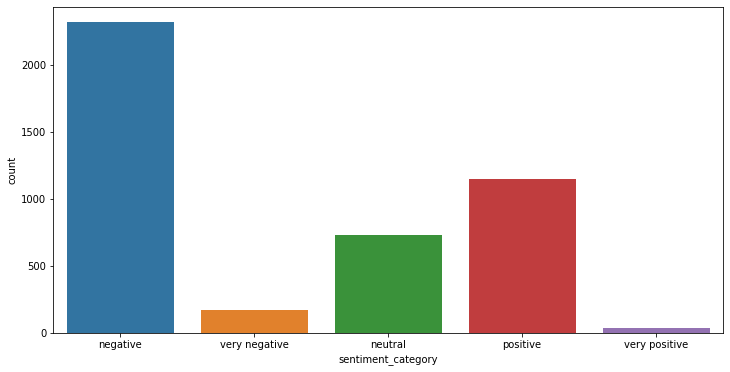

In [27]:
plt.figure(figsize=(12,6))
sns.countplot(x='sentiment_category',data=data_filtered)


In [28]:
fig = go.Figure(go.Funnelarea(
    text =temp.sentiment_category,
    values = temp.text,
    title = {"position": "top center", "text": "Funnel-Chart of Sentiment Distribution"}
    ))
fig.show()

In [29]:
def clean_text(text):

    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

In [31]:
data_filtered['text'] = data_filtered['text'].apply(lambda x:clean_text(x))
data_filtered['selected_text'] = data_filtered['text'].apply(lambda x:clean_text(x))

In [59]:
def remove_stopword(x):
    stop = stopwords.words('english')+ ["corona", "covid", "…", "us", "pandemic","via","may","going","go", "dont","would","new","get", "one","virus", "coronavirus", "covid-19"]
    return [y for y in x if y not in stop]


In [60]:
data_filtered['temp_list'] = data_filtered['selected_text'].apply(lambda x:str(x).split())
data_filtered['temp_list'] = data_filtered['temp_list'].apply(lambda x:remove_stopword(x))
top = Counter([item for sublist in data_filtered['temp_list'] for item in sublist])
temp = pd.DataFrame(top.most_common(20))
temp.columns = ['Common_words','count']
temp.style.background_gradient(cmap='Blues')


In [65]:
veryNegSent = data_filtered[data_filtered['sentiment_category']=='very negative']
negSent = data_filtered[data_filtered['sentiment_category']=='negative']
neutSent = data_filtered[data_filtered['sentiment_category']=='neutral']
posSent = data_filtered[data_filtered['sentiment_category']=='positive']
veryPosSent = data_filtered[data_filtered['sentiment_category']=='very positive']


In [87]:
top = Counter([item for sublist in veryNegSent['temp_list'] for item in sublist])
temp_veryNeg = pd.DataFrame(top.most_common(20))
temp_veryNeg.columns = ['Common_words','count']
temp_veryNeg.style.background_gradient(cmap='hot')

In [88]:
top = Counter([item for sublist in negSent['temp_list'] for item in sublist])
temp_neg = pd.DataFrame(top.most_common(20))
temp_neg.columns = ['Common_words','count']
temp_neg.style.background_gradient(cmap='Oranges')

In [89]:
top = Counter([item for sublist in neutSent['temp_list'] for item in sublist])
temp_neut = pd.DataFrame(top.most_common(20))
temp_neut.columns = ['Common_words','count']
temp_neut.style.background_gradient(cmap='Greys')

In [90]:
top = Counter([item for sublist in posSent['temp_list'] for item in sublist])
temp_pos = pd.DataFrame(top.most_common(20))
temp_pos.columns = ['Common_words','count']
temp_pos.style.background_gradient(cmap='Blues')

In [91]:
top = Counter([item for sublist in veryPosSent['temp_list'] for item in sublist])
temp_veryPos = pd.DataFrame(top.most_common(20))
temp_veryPos.columns = ['Common_words','count']
temp_veryPos.style.background_gradient(cmap='Greens')

In [93]:
fig = px.bar(temp_veryPos, x="count", y="Common_words", title='Most Commmon Very Positive Words', orientation='h', 
             width=700, height=700,color='Common_words')
fig.show()

In [94]:
fig = px.bar(temp_pos, x="count", y="Common_words", title='Most Commmon Positive Words', orientation='h', 
             width=700, height=700,color='Common_words')
fig.show()

In [95]:
fig = px.bar(temp_neut, x="count", y="Common_words", title='Most Commmon Neutral Words', orientation='h', 
             width=700, height=700,color='Common_words')
fig.show()

In [96]:
fig = px.bar(temp_neg, x="count", y="Common_words", title='Most Commmon Negative Words', orientation='h', 
             width=700, height=700,color='Common_words')
fig.show()

In [97]:
fig = px.bar(temp_veryNeg, x="count", y="Common_words", title='Most Commmon Very Negative Words', orientation='h', 
             width=700, height=700,color='Common_words')
fig.show()

In [98]:
def plot_wordcloud(text, mask=None, max_words=200, max_font_size=100, figure_size=(24.0,16.0), color = 'white',
                   title = None, title_size=40, image_color=False):
    stopwords = set(STOPWORDS)
    more_stopwords = {'u', "im"}
    stopwords = stopwords.union(more_stopwords)

    wordcloud = WordCloud(background_color=color,
                    stopwords = stopwords,
                    max_words = max_words,
                    max_font_size = max_font_size, 
                    random_state = 42,
                    width=400, 
                    height=200,
                    mask = mask)
    wordcloud.generate(str(text))
    
    plt.figure(figsize=figure_size)
    if image_color:
        image_colors = ImageColorGenerator(mask);
        plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation="bilinear");
        plt.title(title, fontdict={'size': title_size,  
                                  'verticalalignment': 'bottom'})
    else:
        plt.imshow(wordcloud);
        plt.title(title, fontdict={'size': title_size, 'color': 'black', 
                                  'verticalalignment': 'bottom'})
    plt.axis('off');
    plt.tight_layout()  

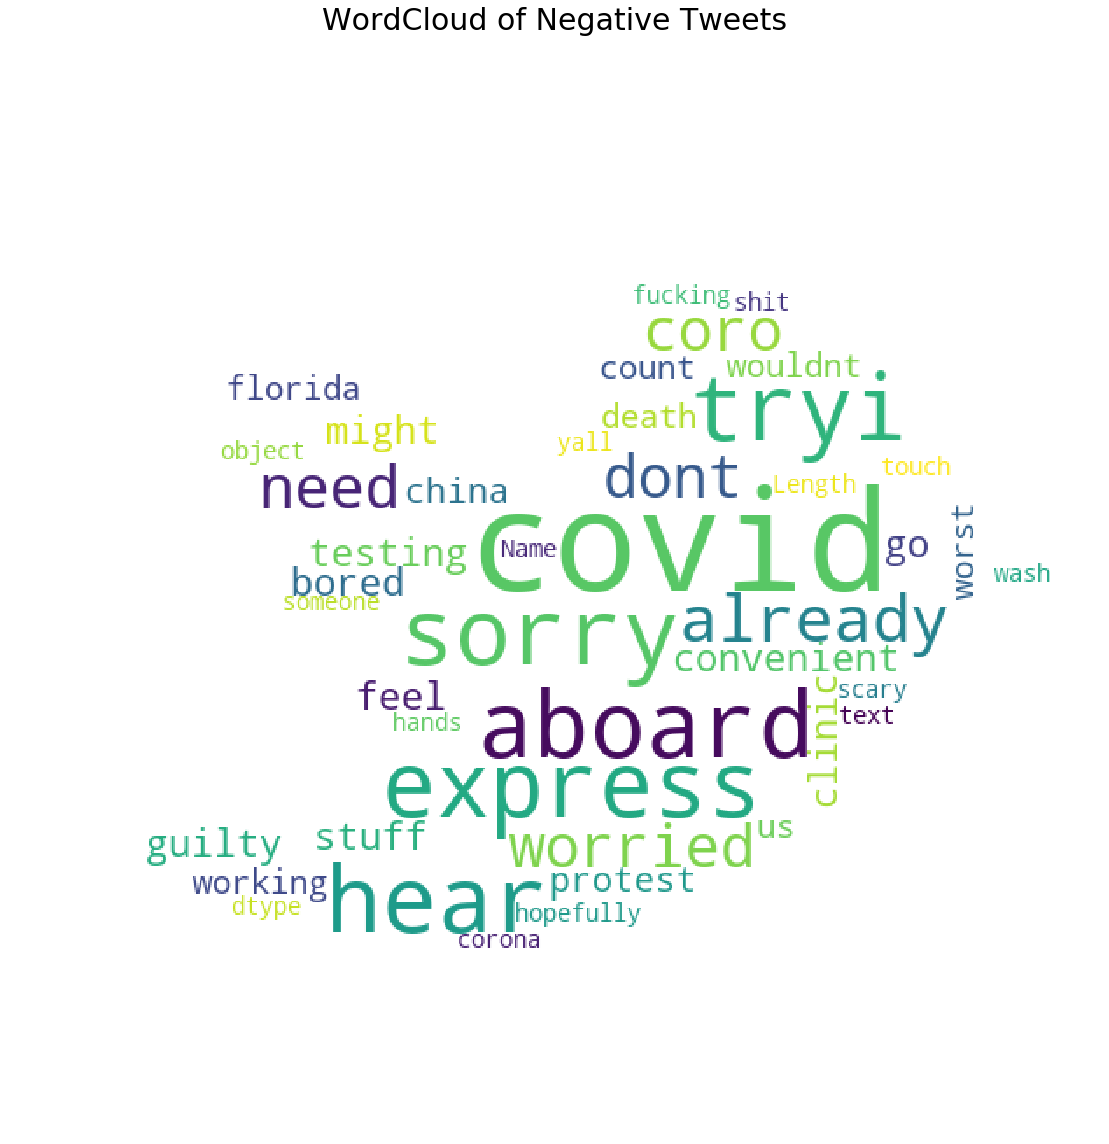

In [110]:
mask = np.array(Image.open('twitter.jpg'))
plot_wordcloud(veryNegSent.text, mask=mask, color='white',max_font_size=80,title_size=30,title="WordCloud of Negative Tweets")


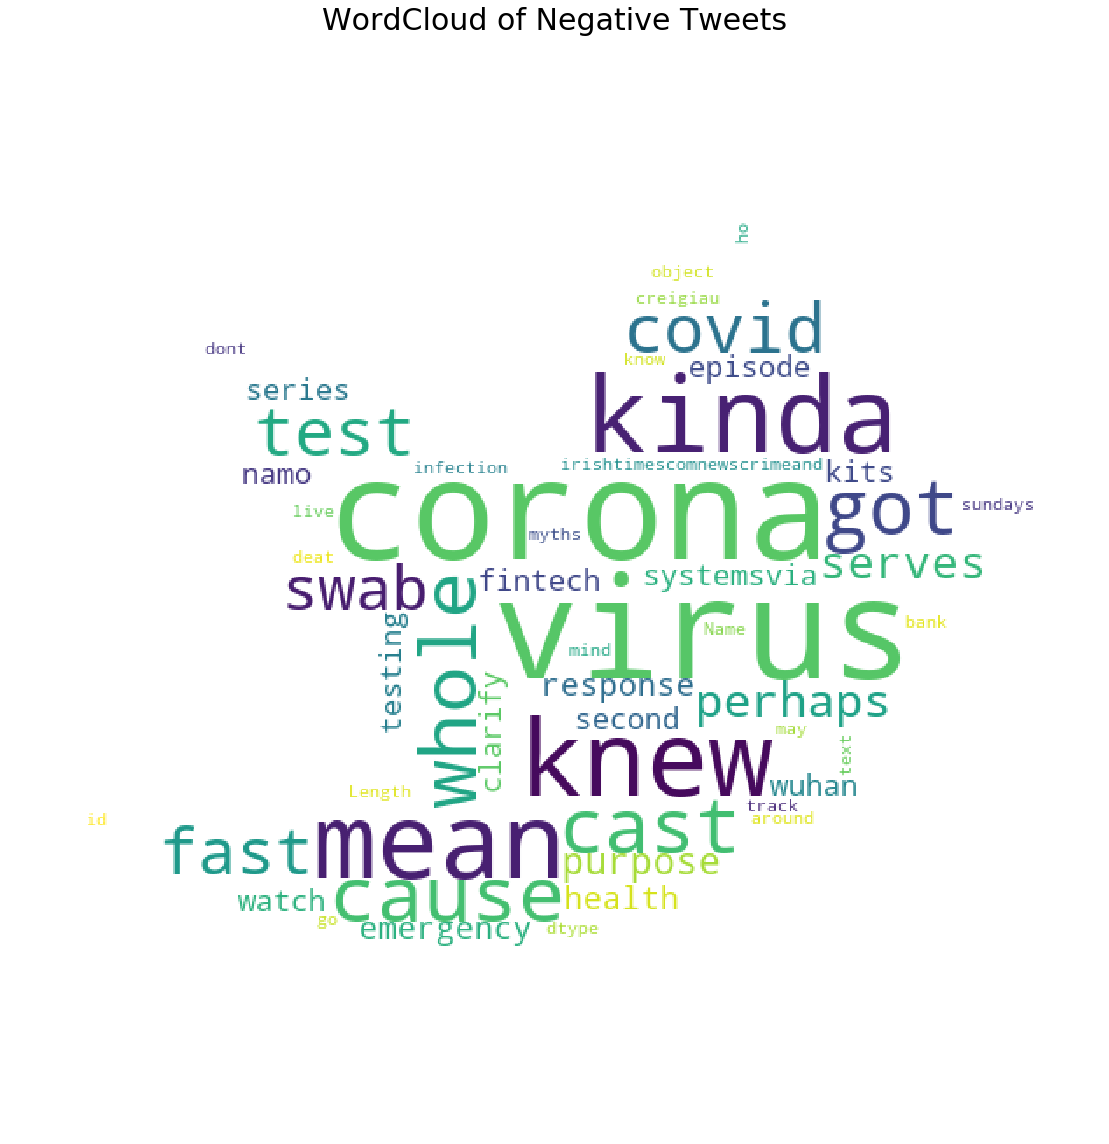

In [109]:
plot_wordcloud(negSent.text, mask=mask, color='white',max_font_size=80,title_size=30,title="WordCloud of Negative Tweets")


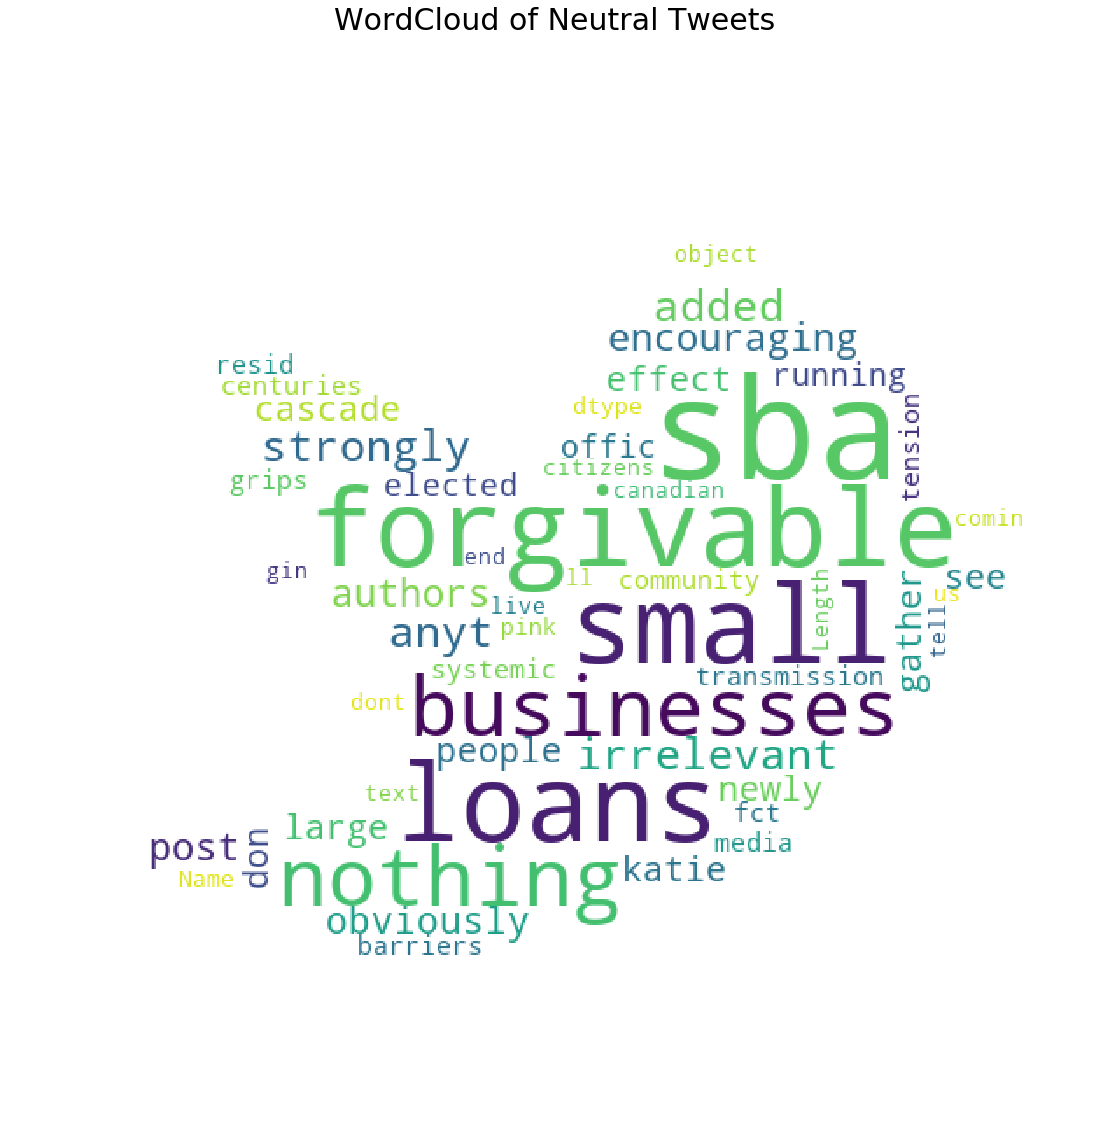

In [111]:
plot_wordcloud(neutSent.text, mask=mask, color='white',max_font_size=80,title_size=30,title="WordCloud of Neutral Tweets")


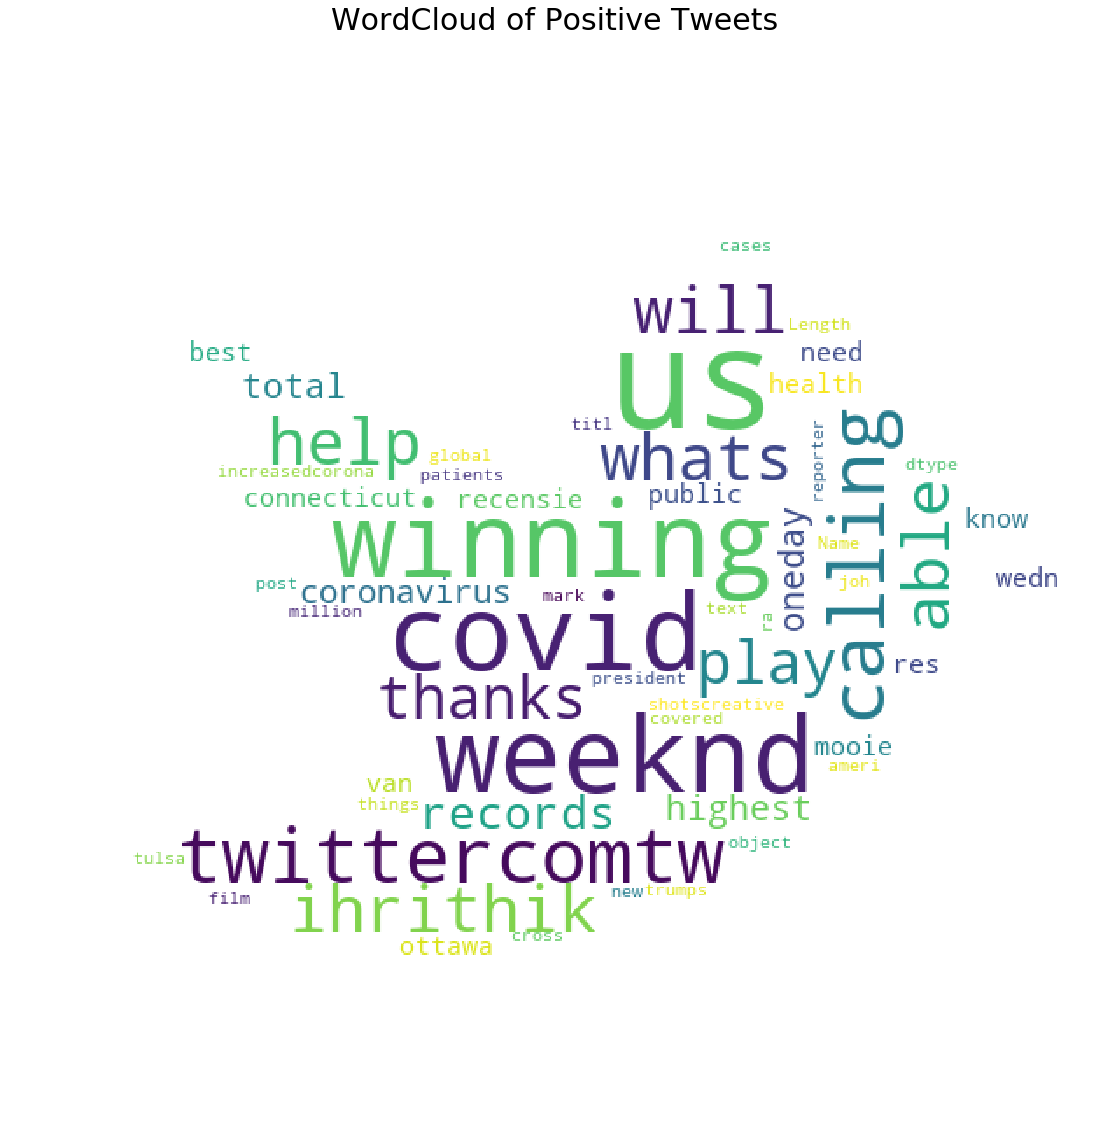

In [113]:
plot_wordcloud(posSent.text, mask=mask, color='white',max_font_size=80,title_size=30,title="WordCloud of Positive Tweets")


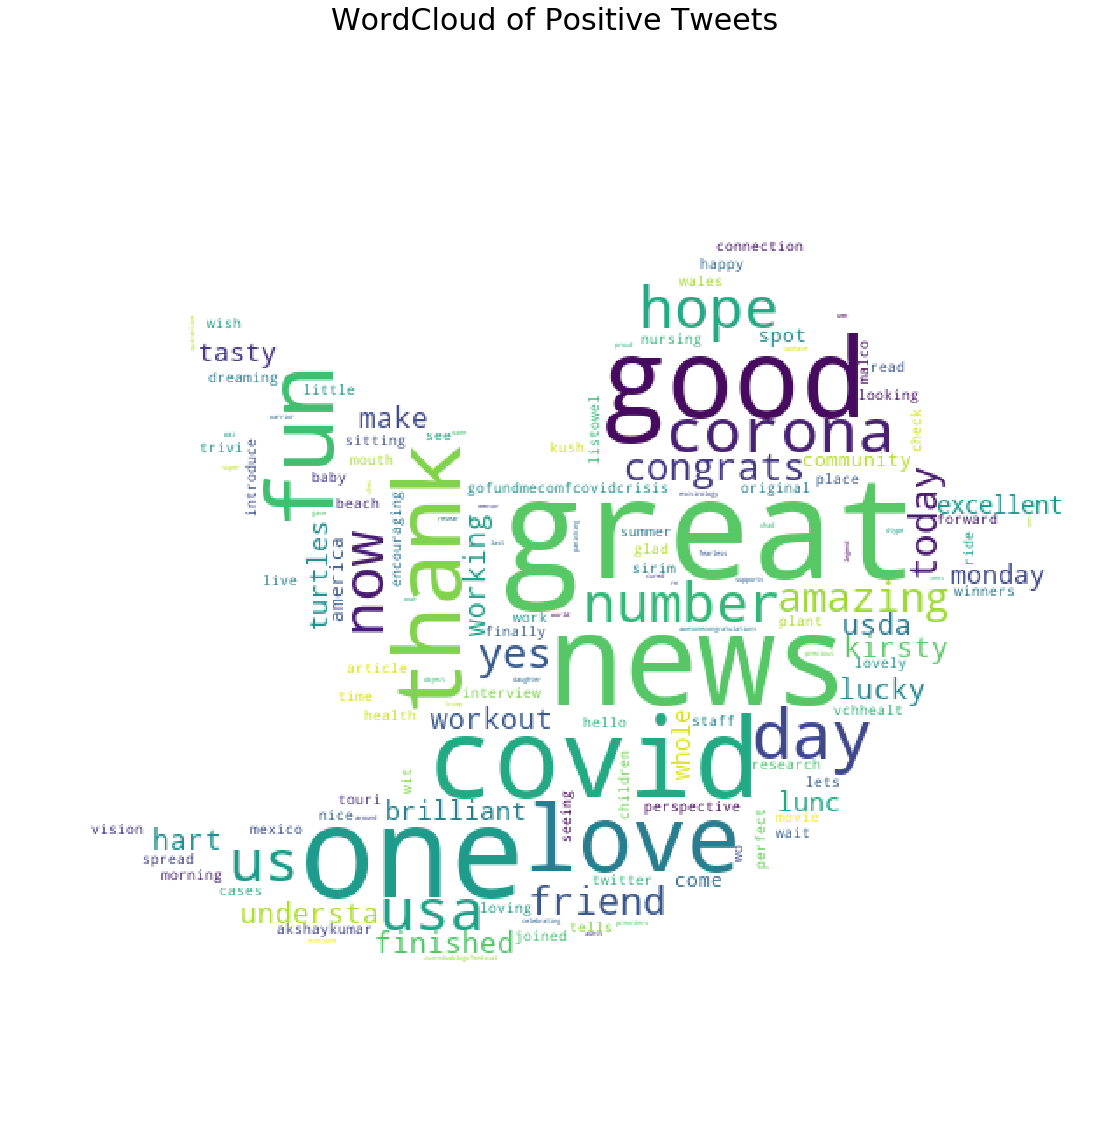

In [114]:
plot_wordcloud(veryPosSent.text, mask=mask, color='white',max_font_size=80,title_size=30,title="WordCloud of Positive Tweets")
